# Linear Classifier in pure TensorFlow

## 3.13 무작위 포인트로 2개의 클래스 생성

In [1]:
import numpy as np

num_samples_per_class = 1000

# Generate separated class of points:
negative_samples = np.random.multivariate_normal(
    mean=[0,3],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples_per_class,
)

positive_samples = np.random.multivariate_normal(
    mean=[3,0],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples_per_class,
)


## 3.14 한 개의 array로 변환 : float64 -> float32

In [2]:
print(negative_samples.dtype)

float64


In [3]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

## 3.15 negative target = 0, positive target = 1 로 타겟 데이터를 만듦

In [4]:
negative_targets = np.zeros((num_samples_per_class, 1))
positive_targets = np.ones((num_samples_per_class, 1))

targets = np.vstack((negative_targets, positive_targets)).astype(np.float32)

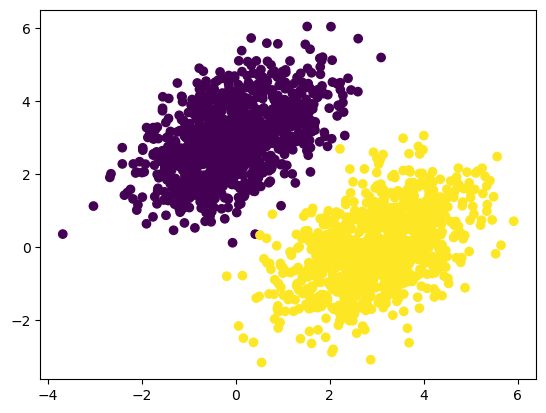

In [5]:
# Plotting
import matplotlib.pyplot as plt

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

## 3.17 선형 분류를 위한 변수 생성

In [6]:
import tensorflow as tf

input_dim = 2
output_dim = 1

W = tf.Variable(
    initial_value=tf.random.uniform(shape=[input_dim, output_dim], dtype=tf.float32),
)
b = tf.Variable(
    initial_value=tf.zeros(shape=[output_dim], dtype=tf.float32),
)

2025-02-08 16:33:10.375748: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-02-08 16:33:10.375785: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-02-08 16:33:10.375791: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-02-08 16:33:10.375925: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-02-08 16:33:10.375935: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## 3.18 Forward pass function

In [7]:
def model(inputs):
    return tf.matmul(inputs, W) + b

## 3.19 Loss function

In [8]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

## 3.20 Training step

In [9]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)

    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

## 3.21 배치처리

In [10]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 1.6424
Loss at step 1: 0.2862
Loss at step 2: 0.1334
Loss at step 3: 0.1093
Loss at step 4: 0.1005
Loss at step 5: 0.0939
Loss at step 6: 0.0880
Loss at step 7: 0.0826
Loss at step 8: 0.0777
Loss at step 9: 0.0732
Loss at step 10: 0.0691
Loss at step 11: 0.0654
Loss at step 12: 0.0619
Loss at step 13: 0.0588
Loss at step 14: 0.0559
Loss at step 15: 0.0533
Loss at step 16: 0.0509
Loss at step 17: 0.0487
Loss at step 18: 0.0467
Loss at step 19: 0.0449
Loss at step 20: 0.0432
Loss at step 21: 0.0416
Loss at step 22: 0.0402
Loss at step 23: 0.0389
Loss at step 24: 0.0378
Loss at step 25: 0.0367
Loss at step 26: 0.0357
Loss at step 27: 0.0348
Loss at step 28: 0.0340
Loss at step 29: 0.0332
Loss at step 30: 0.0325
Loss at step 31: 0.0319
Loss at step 32: 0.0313
Loss at step 33: 0.0308
Loss at step 34: 0.0303
Loss at step 35: 0.0299
Loss at step 36: 0.0295
Loss at step 37: 0.0291
Loss at step 38: 0.0288
Loss at step 39: 0.0285


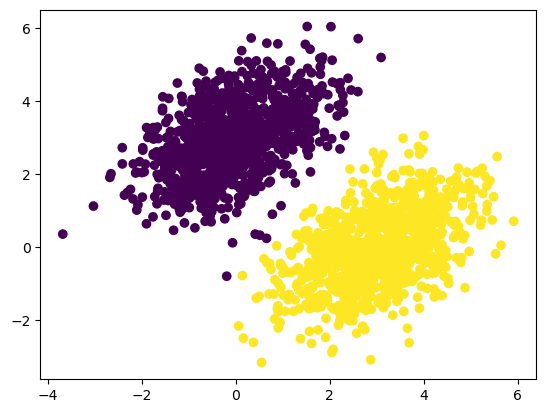

In [11]:
# Plotting the results
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0]>0.5)
plt.show()

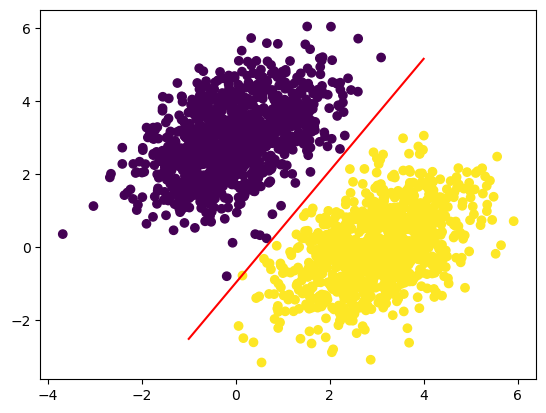

In [13]:
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
